In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.AutoULnet.AutoULnet import *
from NN_library.AutoULnet.train_AutoULnet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


In [2]:
data = dataset_seq()
loaders = get_loaders(data, 16)

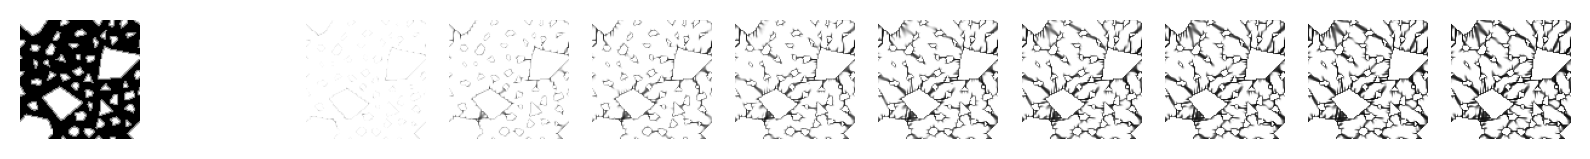

In [8]:
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(15)
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys', vmin=0, vmax=1)
    axs.flat[i].set_axis_off()

In [3]:
name = 'NN_library/AutoULnet/AutoULnet'
args = {'lr' : 0.0001, 'epochs' : 20, 'dev' : dev, 'name' : name}

In [8]:
unet = ULNet()

Using device: cuda


In [6]:
torch.cuda.empty_cache() 

In [9]:
total_params = sum(p.numel() for p in unet.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 133378595


In [5]:
unet = load_network(unet, args['name']+'_0', args)

In [7]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  32992.4882049561
Epoch: 0 batch: 100 mean train loss:  40416.5202636719
Epoch: 0 batch: 200 mean train loss:  32535.6253128052
Epoch: 0 batch: 300 mean train loss:  53167.4896545410
Epoch: 0 batch: 400 mean train loss:  30515.0135917664
Epoch: 0 batch: 500 mean train loss:  36165.0340194702
Epoch: 0 batch: 600 mean train loss:  31433.7176227570
Epoch: 0 batch: 700 mean train loss:  36361.0635070801
Epoch: 0 mean train loss:  38980.4047390925 mean val. rec. loss:  29506.4160156250
Epoch: 1 batch: 0 mean train loss:  30445.9506301880
Epoch: 1 batch: 100 mean train loss:  32033.7084655762
Epoch: 1 batch: 200 mean train loss:  34645.1368751526
Epoch: 1 batch: 300 mean train loss:  41690.1997375488
Epoch: 1 batch: 400 mean train loss:  32008.6917171478
Epoch: 1 batch: 500 mean train loss:  72612.0098266602


KeyboardInterrupt: 

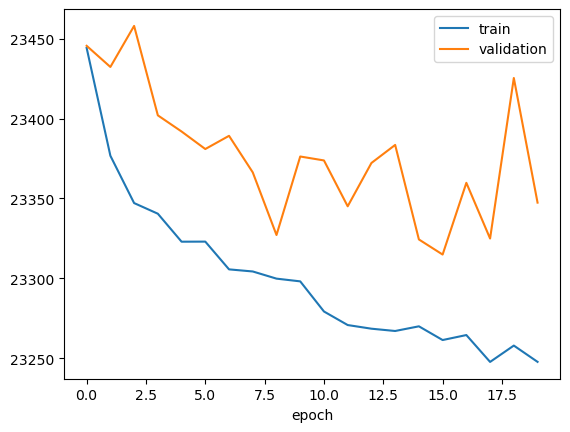

In [17]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])